# Loan Prediction
Predict whether loan can be approved or not for the customers depending on the given features.

Importing Libraries

In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Loan Prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

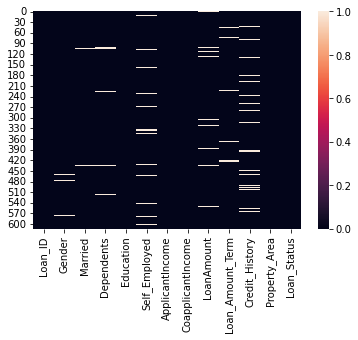

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.shape

(614, 13)

Missing Values

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
len(data)

614

In [10]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

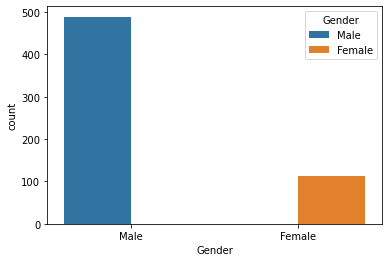

In [12]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, hue='Gender')

Gender  Married
Female  No          80
        Yes         31
Male    Yes        357
        No         130
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

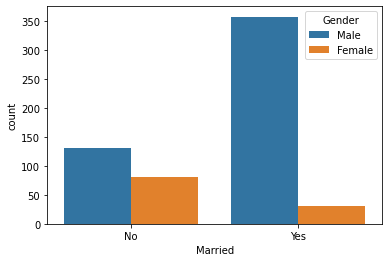

In [13]:
print(data.groupby('Gender')['Married'].value_counts())
sns.countplot(x='Married', data=data, hue='Gender')

Gender  Dependents
Female  0              80
        1              19
        2               7
        3+              3
Male    0             258
        2              92
        1              82
        3+             45
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

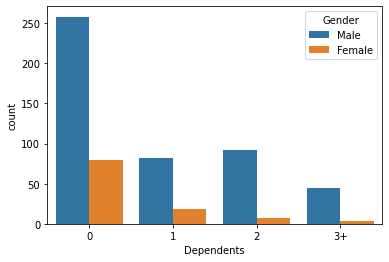

In [14]:
print(data.groupby('Gender')['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, hue='Gender')

Gender  Self_Employed
Female  No                89
        Yes               15
Male    No               402
        Yes               63
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

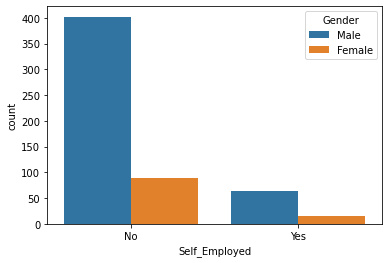

In [15]:
print(data.groupby('Gender')['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, hue='Gender')

Gender  Loan_Amount_Term
Female  360.0                98
        480.0                 4
        180.0                 3
        36.0                  1
        84.0                  1
        240.0                 1
        300.0                 1
Male    360.0               403
        180.0                40
        300.0                11
        480.0                11
        84.0                  3
        120.0                 3
        240.0                 3
        60.0                  2
        12.0                  1
        36.0                  1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

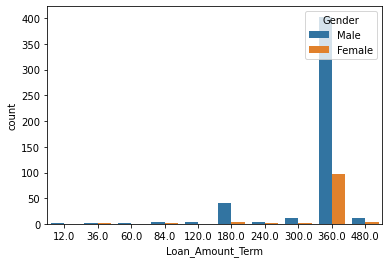

In [16]:
print(data.groupby('Gender')['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, hue='Gender')

Gender  Credit_History
Female  1.0                84
        0.0                17
Male    1.0               382
        0.0                69
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

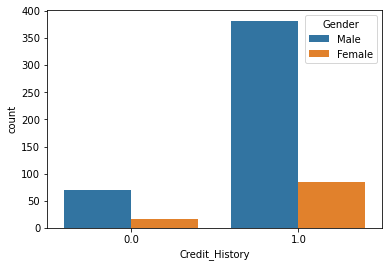

In [17]:
print(data.groupby('Gender')['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, hue='Gender')

In [18]:
data['Gender'].mode()

0    Male
dtype: object

In [19]:
from statistics import mode
from statistics import median
from statistics import mean

In [20]:
data['LoanAmount'].mean()

146.41216216216216

In [21]:
values= {'Gender': mode(data['Gender']),
         'Married' : mode(data['Married']),
         'Dependents' : mode(data['Dependents']),
         'Self_Employed' : mode(data['Self_Employed']),
         'Loan_Amount_Term' : mode(data['Loan_Amount_Term']),
         'Credit_History' : mode(data['Credit_History']),
         'LoanAmount' : data['LoanAmount'].mean()
        }

In [22]:
data.fillna(values,inplace=True)

In [23]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Outliers

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
import math

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

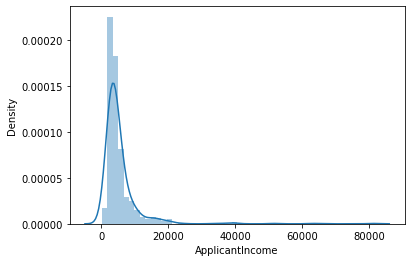

In [26]:
sns.distplot(data['ApplicantIncome'])

In [27]:
data['ApplicantIncome']= data['ApplicantIncome'].apply(np.log)

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

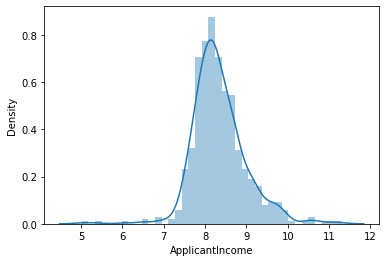

In [28]:
sns.distplot(data['ApplicantIncome'])

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

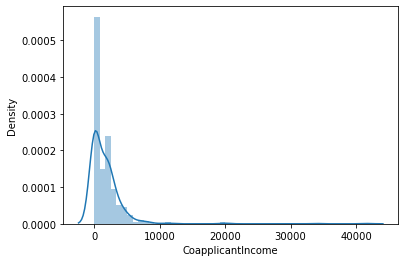

In [29]:
sns.distplot(data['CoapplicantIncome'])

In [30]:
data['CoapplicantIncome'].isnull().sum()

0

In [31]:
data['CoapplicantIncome']= data['CoapplicantIncome'].apply(np.log)

In [32]:
data['CoapplicantIncome'].isnull().sum()

0

In [33]:
len(data['CoapplicantIncome'])

614

In [34]:
np.isfinite(data['CoapplicantIncome']).sum()

341

In [35]:
data['CoapplicantIncome']= data['CoapplicantIncome'].replace([np.inf, -np.inf], np.nan)

In [36]:
data['CoapplicantIncome'].isnull().sum()

273

In [37]:
data['CoapplicantIncome'].mean()

7.724035782644366

In [38]:
data['CoapplicantIncome']= data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mean())

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

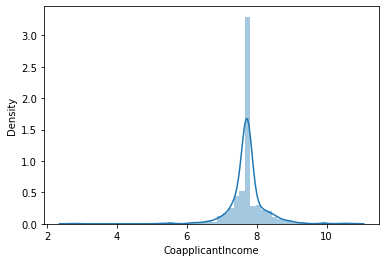

In [39]:
sns.distplot(data['CoapplicantIncome'])

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

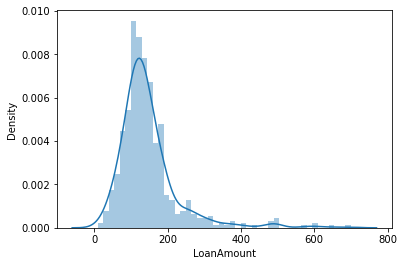

In [40]:
sns.distplot(data['LoanAmount'])

In [41]:
data['LoanAmount']=data['LoanAmount'].apply(np.log)

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

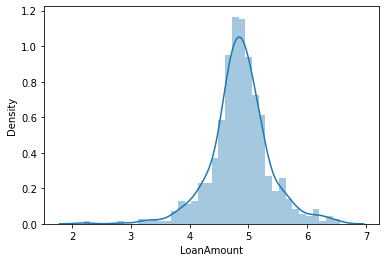

In [42]:
sns.distplot(data['LoanAmount'])

In [43]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,7.724036,4.986426,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,7.724036,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,7.724036,4.948760,360.0,1.0,Urban,Y


<AxesSubplot:>

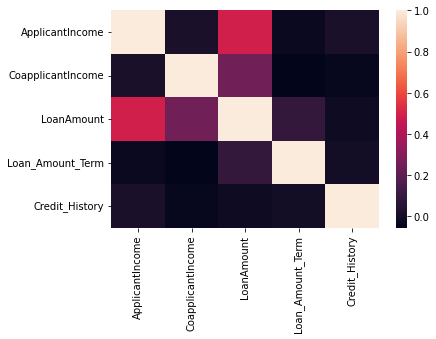

In [44]:
sns.heatmap(data.corr())

Encoding

In [45]:
y= data['Loan_Status']
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [46]:
y= pd.get_dummies(y, drop_first=True)
y.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [47]:
x= data.drop(['Loan_ID','Loan_Status'], axis='columns')
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674026,7.724036,4.986426,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006368,7.724036,4.189655,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban
4,Male,No,0,Graduate,No,8.699515,7.724036,4.948760,360.0,1.0,Urban


In [48]:
x= pd.get_dummies(x, drop_first=True)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674026,7.724036,4.986426,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430109,7.318540,4.852030,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006368,7.724036,4.189655,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.856707,7.765569,4.787492,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699515,7.724036,4.948760,360.0,1.0,1,0,0,0,0,0,0,0,1


Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
import warnings; warnings.simplefilter('ignore')
LR= LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred= LR.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 21  35]
 [  3 126]]
Accuracy Percentage = 0.7945945945945946
              precision    recall  f1-score   support

           0       0.88      0.38      0.53        56
           1       0.78      0.98      0.87       129

    accuracy                           0.79       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.79      0.76       185



Naive Bayes

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [55]:
from sklearn.naive_bayes import GaussianNB
import warnings; warnings.simplefilter('ignore')
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred = nb.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 29  35]
 [  2 119]]
Accuracy Percentage = 0.8
              precision    recall  f1-score   support

           0       0.94      0.45      0.61        64
           1       0.77      0.98      0.87       121

    accuracy                           0.80       185
   macro avg       0.85      0.72      0.74       185
weighted avg       0.83      0.80      0.78       185



Random Forest

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [59]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=5, criterion='entropy')
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [60]:
y_pred= RFC.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 28  25]
 [ 20 112]]
Accuracy Percentage = 0.7567567567567568
              precision    recall  f1-score   support

           0       0.58      0.53      0.55        53
           1       0.82      0.85      0.83       132

    accuracy                           0.76       185
   macro avg       0.70      0.69      0.69       185
weighted avg       0.75      0.76      0.75       185



Support Vector Machine

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [63]:
from sklearn.svm import SVC
SVM= SVC(kernel='linear')
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [64]:
y_pred = SVM.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 21  28]
 [  1 135]]
Accuracy Percentage = 0.8432432432432433
              precision    recall  f1-score   support

           0       0.95      0.43      0.59        49
           1       0.83      0.99      0.90       136

    accuracy                           0.84       185
   macro avg       0.89      0.71      0.75       185
weighted avg       0.86      0.84      0.82       185



K-Nearest Neighbor 

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred = KNN.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 18  41]
 [ 11 115]]
Accuracy Percentage = 0.7189189189189189
              precision    recall  f1-score   support

           0       0.62      0.31      0.41        59
           1       0.74      0.91      0.82       126

    accuracy                           0.72       185
   macro avg       0.68      0.61      0.61       185
weighted avg       0.70      0.72      0.69       185



Feature Scaling

In [70]:
#1. Normalization 
# [In Normalization we will get values in range of 0-1]
from sklearn.preprocessing import Normalizer
nr = Normalizer()
x1 = nr.fit_transform(x)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3)

In [72]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [73]:
y_pred =LR.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  59]
 [  0 126]]
Accuracy Percentage = 0.6810810810810811
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.68      1.00      0.81       126

    accuracy                           0.68       185
   macro avg       0.34      0.50      0.41       185
weighted avg       0.46      0.68      0.55       185



In [75]:
# K-Nearest Neighbor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred = KNN.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 18  33]
 [  9 125]]
Accuracy Percentage = 0.772972972972973
              precision    recall  f1-score   support

           0       0.67      0.35      0.46        51
           1       0.79      0.93      0.86       134

    accuracy                           0.77       185
   macro avg       0.73      0.64      0.66       185
weighted avg       0.76      0.77      0.75       185



Standardization

In [79]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x2 = SC.fit_transform(x)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.3)

In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_pred = LR.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 22  41]
 [  2 120]]
Accuracy Percentage = 0.7675675675675676
              precision    recall  f1-score   support

           0       0.92      0.35      0.51        63
           1       0.75      0.98      0.85       122

    accuracy                           0.77       185
   macro avg       0.83      0.67      0.68       185
weighted avg       0.80      0.77      0.73       185



In [84]:
# K-Nearest Neighbor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.3)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred = KNN.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Percentage =",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 26  32]
 [ 10 117]]
Accuracy Percentage = 0.772972972972973
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        58
           1       0.79      0.92      0.85       127

    accuracy                           0.77       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.77      0.77      0.76       185

